# 4-2B
## 1993-2000年中國社會消費品零售總額拟合
### table_a1.17.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.api as sm

## 画时序图，ACF，PACF

In [2]:
def drawer(series):
    plt.figure(figsize=(10,8))
    timeseries = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    acf = plt.subplot2grid((2, 2), (1, 0))
    pacf = plt.subplot2grid((2, 2), (1, 1))

    timeseries.plot(series, '*-')
    timeseries.set_title("Analysis")
    smt.graphics.plot_acf(series, lags=None, ax=acf, alpha=0.05)
    smt.graphics.plot_pacf(series, lags=None, ax=pacf, alpha=0.05)

    plt.show()
    plt.close()

## 画比较图

In [3]:
def drawcompare(series, prediction):
    plt.plot(series, "*-", label='observe')
    plt.plot(prediction, label='fittes')
    plt.legend()
    plt.show()
    plt.close()

## 开始分析

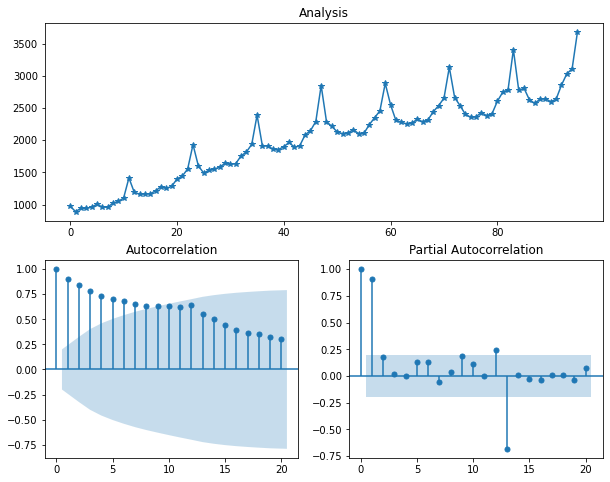

In [4]:
filename = "table_a1.17.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
drawer(series)

In [5]:
x = np.arange(1, len(series) + 1)
x2times = x ** 2

## 线性拟合T=a+bt 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     689.4
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           4.58e-45
Time:                        11:34:10   Log-Likelihood:                -654.41
No. Observations:                  96   AIC:                             1313.
Df Residuals:                      94   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        983.5601     45.933     21.413      0.0

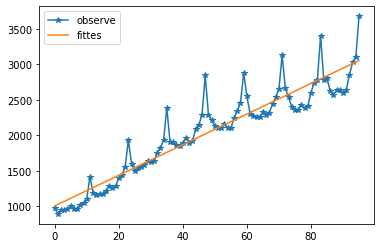

In [6]:
model = sm.OLS(series, sm.add_constant(x))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(x))
drawcompare(series, prediction)

## 曲线拟合T=a+bt^2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     320.4
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           4.84e-32
Time:                        11:34:14   Log-Likelihood:                -684.97
No. Observations:                  96   AIC:                             1374.
Df Residuals:                      94   BIC:                             1379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1399.9845     47.149     29.693      0.0

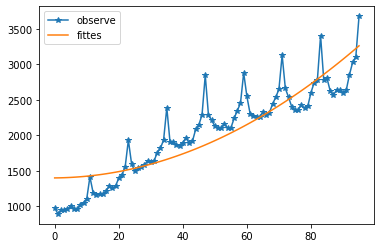

In [7]:
model = sm.OLS(series, sm.add_constant(x2times))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(x2times))
drawcompare(series, prediction)

## 曲线拟合T=a+bt=ct^2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     393.4
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           4.17e-46
Time:                        11:34:17   Log-Likelihood:                -648.33
No. Observations:                  96   AIC:                             1303.
Df Residuals:                      93   BIC:                             1310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        807.6928     65.875     12.261      0.0

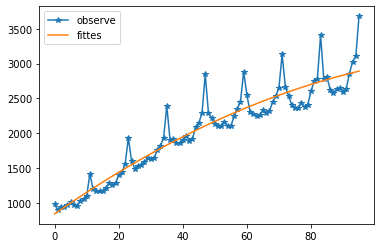

In [8]:
xx2times = np.c_[x, x2times]
model = sm.OLS(series, sm.add_constant(xx2times))
model = model.fit()
print(model.summary())
prediction = model.predict(sm.add_constant(xx2times))
drawcompare(series, prediction)